In [1]:
# for Phase_I_II data

import numpy as np
import pandas as pd
import os, shutil, sys, time
from scipy import stats
from matplotlib import pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
starting_dir = os.getcwd()
print (starting_dir)

/Users/kimd999/research/script_not_in_dropbox/srpAnalytics/analysis/latest/2_analysis/after_reformat/investigate_MO24_MORT/investigate_MO24_MORT


In [5]:
# mac - phase I,II, morpho after Lisa cleanup
complete_file_path = '/Users/kimd999/research/projects/toxicity/per_each_data/phase_I_II/input/morpho/wide/zf_morphology_data_335_chemicals_2020DEC16_wide_DNC_0.csv'

morphological_data = pd.read_csv(complete_file_path, header = 0)
pd.set_option('display.max_columns', None)
display(morphological_data.head())
#display(morphological_data.columns)
#len(morphological_data)
#display(np.unique(morphological_data.well))

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,DP24,EYE_,JAW_,MO24,MORT,NC24,NC__,OTIC,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
morphological_data['TOT_MORT'] = morphological_data[['MO24','MORT']].sum(axis=1,skipna=True,min_count=1)
morphological_data.to_csv("w_TOT_MORT.csv", index=False)

In [27]:
TOT_MORT_1_morphological_data = morphological_data.loc[morphological_data['TOT_MORT'] == 1,['chemical.id', 'conc', 'plate.id', 'well']]
len(TOT_MORT_1_morphological_data)

7718

In [28]:
TOT_MORT_0_morphological_data = morphological_data.loc[morphological_data['TOT_MORT'] == 0,['chemical.id', 'conc', 'plate.id', 'well']]
len(TOT_MORT_0_morphological_data)

35763

In [29]:
TOT_MORT_0_morphological_data = morphological_data.loc[morphological_data['TOT_MORT'] == "",['chemical.id', 'conc', 'plate.id', 'well']]
len(TOT_MORT_0_morphological_data)

0

In [ ]:
MORT_1_morphological_data = morphological_data.loc[morphological_data['MORT'] == 1,['chemical.id', 'conc', 'plate.id', 'well']]
len(MORT_1_morphological_data)

In [19]:
MORT_1_morphological_data = morphological_data.loc[morphological_data['MORT'] == 1,['chemical.id', 'conc', 'plate.id', 'well']]
len(MORT_1_morphological_data)

3096

In [40]:
#new_morphological_data = morphological_data.loc[(morphological_data['MO24'] == 0) & (pd.isnull(morphological_data['MORT'])),['chemical.id', 'conc', 'plate.id', 'well']]
#len(new_morphological_data)

0

In [42]:
new_morphological_data = morphological_data.loc[(morphological_data['MO24']==0) & (morphological_data['MORT']==0),['chemical.id', 'conc', 'plate.id', 'well']]
len(new_morphological_data)

35763

In [25]:
#MORT_0_morphological_data = morphological_data.loc[morphological_data['MORT'] == '\t',['chemical.id', 'conc', 'plate.id', 'well']]
#len(MORT_0_morphological_data)

0

In [18]:
MO24_1_morphological_data = morphological_data.loc[morphological_data['MO24'] == 1,['chemical.id', 'conc', 'plate.id', 'well']]
len(MO24_1_morphological_data)

4626

In [17]:
MO24_non_1_morphological_data = morphological_data.loc[morphological_data['MO24'] != 1,['chemical.id', 'conc', 'plate.id', 'well']]
len(MO24_non_1_morphological_data)

38857

In [ ]:
MORT_24MO24_1_morphological_data = morphological_data.loc[morphological_data['MO24'] == 1,['chemical.id', 'conc', 'plate.id', 'well']]
len(MO24_1_morphological_data)

In [4]:
test_data_sim = 0
if(test_data_sim == 0):
    # Add aggregate endpoints
    # 1. Any effect at 24hrs (combination of MO24, DP24 and SM24) >> 'ANY24'
    # 2. Any effect within 5 days (combination of all measurements at both time points)
    # 3. Total mortality (MO24 + MORT) >> 'TOT_MORT'
    # 4. Any effect except mortality (#2 minus MO24 and MORT) >> 'ANY_MORT'
    # Add new endpoints
    # BRAIN	OTIC	PFIN >> 'BRN_'
    # EYE	SNOUT	JAW >> 'CRAN'
    # YSE	PE >> 'EDEM'
    # TRUNK	CFIN >> 'LTRK'
    # CIRC	SWIM	SOMITE >> 'MUSC'
    # PIG_ >> 'SKIN'
    # TR_ >> 'TCHR'
    morphological_data['ANY24'] = morphological_data[['MO24','DP24','SM24','NC24']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['ANY120'] = morphological_data[['MORT', 'YSE_', 'AXIS', 'EYE_', 'SNOU', 'JAW_', 'OTIC', \
                                                       'PE__', 'BRAI', 'SOMI', 'PFIN', 'CFIN', 'PIG_', 'CIRC', \
                                                       'TRUN', 'SWIM', 'NC__', 'TR__', 'ANY24']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['TOT_MORT'] = morphological_data[['MO24','MORT']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['ALL_BUT_MORT'] = morphological_data[['DP24','SM24','NC24', 'YSE_', 'AXIS', 'EYE_', 'SNOU', 'JAW_', 'OTIC', \
                                                       'PE__', 'BRAI', 'SOMI', 'PFIN', 'CFIN', 'PIG_', 'CIRC','TRUN', 'SWIM', 'NC__', \
                                                       'TR__']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['BRN_'] = morphological_data[['BRAI','OTIC','PFIN']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['CRAN'] = morphological_data[['EYE_', 'SNOU', 'JAW_']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['EDEM'] = morphological_data[['YSE_','PE__']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['LTRK'] = morphological_data[['TRUN','CFIN']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['MUSC'] = morphological_data[['CIRC','SWIM','SOMI']].sum(axis=1,skipna=True,min_count=1)
    morphological_data['SKIN'] = morphological_data[['PIG_']]
    morphological_data['TCHR'] = morphological_data[['TR__']]

In [5]:
display(morphological_data.head())

,chemical.id,plate.id,well,chemical_plate_well,conc,AXIS,BRAI,CFIN,CIRC,DNC_,DP24,EYE_,JAW_,MO24,MORT,NC24,NC__,OTIC,PE__,PFIN,PIG_,SM24,SNOU,SOMI,SWIM,TRUN,TR__,YSE_,ANY24,ANY120,TOT_MORT,ALL_BUT_MORT,BRN_,CRAN,EDEM,LTRK,MUSC,SKIN,TCHR
0,53,9289,A01,53_9289_A01,50.0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,53,9289,A02,53_9289_A02,35.6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,53,9289,A03,53_9289_A03,11.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,53,9289,A04,53_9289_A04,5.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0,0.0,5.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0
4,53,9289,A05,53_9289_A05,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
if (os.path.isdir("output") == True):
    shutil.rmtree("output")
os.mkdir("output")

output_folder = os.path.join(starting_dir, "output")
os.chdir(output_folder)

if (os.path.isdir("report") == False):
    os.mkdir("report")
    
morphological_data_filename = os.path.join("report", 'morphological_data_after_merging_endpoints.csv')
morphological_data.to_csv(morphological_data_filename, index=False)

In [7]:
erased_since_gt_0p5_1_neg_filename = os.path.join("report", 'erased_since_gt_0p5_1_neg.csv')
erased_since_gt_0p5_1_neg_file = open(erased_since_gt_0p5_1_neg_filename, "w")
write_this="chemical_id,plate_id,end_point\n"
erased_since_gt_0p5_1_neg_file.write(write_this)
erased_since_gt_0p5_1_neg_file.close()


kept_since_lt_0p5_1_neg_filename = os.path.join("report", 'kept_since_lt_0p5_1_neg.csv')
kept_since_lt_0p5_1_neg_file = open(kept_since_lt_0p5_1_neg_filename, "w")
write_this="chemical_id,plate_id,end_point\n"
kept_since_lt_0p5_1_neg_file.write(write_this)
kept_since_lt_0p5_1_neg_file.close()



erased_since_lt_0p25_filled_filename = os.path.join("report", 'erased_since_lt_0p25_filled.csv')
erased_since_lt_0p25_filled_file = open(erased_since_lt_0p25_filled_filename, "w")
write_this="chemical_id,end_point,dose\n"
erased_since_lt_0p25_filled_file.write(write_this)
erased_since_lt_0p25_filled_file.close()


kept_since_gt_0p25_filled_filename = os.path.join("report", 'kept_since_gt_0p25_filled.csv')
kept_since_gt_0p25_filled_file = open(kept_since_gt_0p25_filled_filename, "w")
write_this="chemical_id,end_point,dose\n"
kept_since_gt_0p25_filled_file.write(write_this)
kept_since_gt_0p25_filled_file.close()

In [8]:
start_time = time.time()

bmd_feasibility_flag_filename = os.path.join("report", 'bmd_feasibility_flag.csv')
bmd_feasibility_flag_file_out = open(bmd_feasibility_flag_filename, "w")

write_this = "bmd_feasibility_flag\n"
bmd_feasibility_flag_file_out.write(write_this)

# all before merging/generating new endpoints
#end_points = ['AXIS','BRAI','CFIN','CIRC','DP24','EYE_','JAW_','MO24','MORT','NC24','NC__',\
              'OTIC','PE__','PFIN','PIG_','SM24','SNOU','SOMI','SWIM','TRUN','TR__','YSE_']

# full_oregon_state_request -> 18 (without DNC)
end_points = ['ANY24','ANY120','AXIS','ALL_BUT_MORT','BRN_','CRAN','DP24','EDEM','LTRK','MO24','MORT','MUSC','NC24','NC__','SKIN','SM24','TCHR','TOT_MORT']
#end_points = ['TCHR']

# all 342 chemicals
for chemical_id in np.unique(morphological_data['chemical.id']):
    
#for chemical_id in [62]:
    print("chemical_id:" + str(chemical_id))

    for end_point in end_points:
        os.chdir(output_folder)
        # subset original dataframe for a user-specified chemical and end_point pair
        morphological_data_end_point_chemical_id = morphological_data.loc[morphological_data['chemical.id'] == chemical_id,['chemical.id', 'conc', 'plate.id', 'well', end_point]]
        
        # Binarize end-point hits (Values > 1 are forced to 1)
        end_point_hits = morphological_data_end_point_chemical_id[end_point]
        end_point_hits.loc[end_point_hits > 0] = 1
                  
        dose_response = gdr.gen_dose_response(morphological_data_end_point_chemical_id, end_point)
        
        bmd_feasibility_flag = gdr.BMD_feasibility_analysis(dose_response)
        bmd_feasibility_flag_file_out.write(str(bmd_feasibility_flag)+"\n")

        print ("dose_response:" + str(dose_response))        
        '''dose  num_affect  frac_affect  num_embryos  tot_wells
        0   0.0         0.0     0.000000         26.0       32.0
        1   0.1         1.0     0.032258         31.0       32.0
        2   0.5         1.0     0.062500         16.0       32.0
        '''
        test_dose_response = gdr.reformat_dose_response(dose_response)
        print ("test_dose_response:" + str(test_dose_response))
        '''dose  num_affected  total_num
        0   0.0           0.0       26.0
        1   0.1           1.0       31.0
        2   0.5           1.0       16.0
        '''
        
        #bmd_feasibility_flag_folder = "bmd_feasibility_" + str(bmd_feasibility_flag)
        #if (os.path.isdir(str(bmd_feasibility_flag_folder)) == False):
        #    os.mkdir(str(bmd_feasibility_flag_folder))
        #os.chdir(str(bmd_feasibility_flag_folder))

        if(bmd_feasibility_flag in [0, 1]):
            # No BMD analysis required. Generate report and exit
            ps.save_results_poor_data_or_no_convergence(test_dose_response, bmd_feasibility_flag, str(chemical_id), end_point, None)
        else:
            # Fit dose response models
            model_predictions = bmdest.analyze_dose_response_data(test_dose_response)
            # Select best model
            selected_model_params = bmdest.select_model(model_predictions)
            # Check if unique model is found
            unique_model_flag = selected_model_params['no_unique_model_found_flag']
            if(unique_model_flag == 0):
                # Generate report
                print(test_dose_response.dose[-1:])
                ps.save_results_good_data_unique_model(test_dose_response, bmd_feasibility_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
            else:
                bmd_analysis_flag = selected_model_params['model_select_flag']
                if(bmd_analysis_flag == 1):
                    ps.save_results_poor_data_or_no_convergence(test_dose_response, bmd_feasibility_flag, str(chemical_id), end_point, selected_model_params)
                else:
                    ps.save_results_good_data_nounique_model(test_dose_response, bmd_feasibility_flag, model_predictions, selected_model_params, str(chemical_id), end_point)
bmd_feasibility_flag_file_out.close()
end_time = time.time()
time_took = str(round((end_time-start_time), 1)) + " seconds"
print ("Done, it took:"+str(time_took)) 
# for all combinations of 342 chemicals and 18 endpoints, 4 minutes took for bmd_feasibility only
# for all combinations of 342 chemicals and 18 endpoints, 104~165 minutes took for bmd_feasibility and bmd report

os.chdir(output_folder)
time_filename = os.path.join("report", 'running_time.txt')
f_time = open(time_filename, 'w')
f_time.write(str(time_took))
f_time.close() 


chemical_id:62
data_ep_cid:
      chemical.id  conc plate.id well  AXIS
1344           62  5.00    12839  A01   NaN
1345           62  3.56    12839  A02   NaN
1346           62  1.12    12839  A03   NaN
1347           62  0.50    12839  A04   NaN
1348           62  0.10    12839  A05   1.0
...           ...   ...      ...  ...   ...
1531           62  3.56    12841  H08   NaN
1532           62  1.12    12841  H09   NaN
1533           62  0.50    12841  H10   0.0
1534           62  0.10    12841  H11   0.0
1535           62  0.00    12841  H12   0.0

[192 rows x 5 columns]
dose_response (after dropna):
   dose  num_affect  frac_affect  num_embryos  tot_wells
0   0.0         3.0     0.115385         26.0       32.0
1   0.1         2.0     0.064516         31.0       32.0
2   0.5         2.0     0.125000         16.0       32.0
dose_response:   dose  num_affect  frac_affect  num_embryos  tot_wells
0   0.0         3.0     0.115385         26.0       32.0
1   0.1         2.0     0.064516  

In [9]:
#print (morphological_data_end_point_chemical_id)
np.asarray(morphological_data_end_point_chemical_id['plate.id'])

array(['12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12839', '12839',
       '12839', '12839', '12839', '12839', '12839', '12841', '12841',
       '12841', '128

In [10]:
#[np.unique(morphological_data_end_point_chemical_id['chemical.id'].values()),1]

bmd_feasibility_flag_filename:output/report/bmd_feasibility_flag.csv


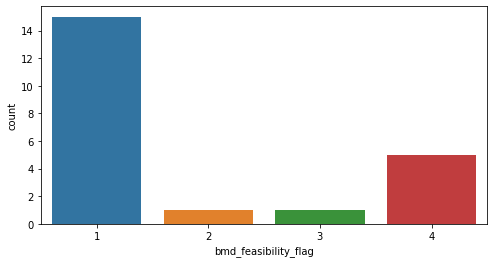

In [11]:
os.chdir(starting_dir)

#bmd_feasibility_flag_filename="/Users/kimd999/research/projects/toxicity/result/old_Phase_I_II/newest_criteria_no_avg/report/bmd_feasibility_flag.csv"
bmd_feasibility_flag_filename = os.path.join("output", "report", 'bmd_feasibility_flag.csv')
print ("bmd_feasibility_flag_filename:"+str(bmd_feasibility_flag_filename))
bmd_feasibility_flag_data = pd.read_csv(bmd_feasibility_flag_filename, index_col=None)
#display(bmd_feasibility_flag_data.head())
ds = pd.Series({"Column": bmd_feasibility_flag_data["bmd_feasibility_flag"]})
plt.figure(figsize=(8,4))
sns.countplot(x="Column", data=ds)
plt.show()

In [12]:
'''os.chdir(starting_dir)

sns.set_theme(style="whitegrid")
print ("array_filename:"+str(array_filename))
array_report_data = pd.read_csv(array_filename, index_col=None)
display(array_report_data.head())
#ax = sns.barplot(x="end_point", y="len_test_dose_response", data=array_report_data)

ds = pd.Series({"Column": array_report_data["len_test_dose_response"]})
plt.figure(figsize=(8,4))
plt.xlabel("leng")
sns.countplot(x="Column", data=ds)
plt.show()
print ("done")'''

'os.chdir(starting_dir)\n\nsns.set_theme(style="whitegrid")\nprint ("array_filename:"+str(array_filename))\narray_report_data = pd.read_csv(array_filename, index_col=None)\ndisplay(array_report_data.head())\n#ax = sns.barplot(x="end_point", y="len_test_dose_response", data=array_report_data)\n\nds = pd.Series({"Column": array_report_data["len_test_dose_response"]})\nplt.figure(figsize=(8,4))\nplt.xlabel("leng")\nsns.countplot(x="Column", data=ds)\nplt.show()\nprint ("done")'

In [13]:
test_dose_response.dose

0    0.0
1    0.1
2    0.5
Name: dose, dtype: float64

In [14]:
#test_dose_response.dose.iloc[0]+test_dose_response.dose.iloc[1]

In [15]:
dose_response['num_affect']/dose_response['num_embryos']

0    0.115385
1    0.000000
2    0.000000
dtype: float64